<a href="https://colab.research.google.com/github/smybilginn/digital_image_processing/blob/main/3_spatial_filtering_smoothing_and_sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving chestX-ray.jpg to chestX-ray.jpg
Saving chestX-ray1.webp to chestX-ray1.webp


1️⃣ Kütüphaneleri yükleyelim ve görüntüleri okuyalım

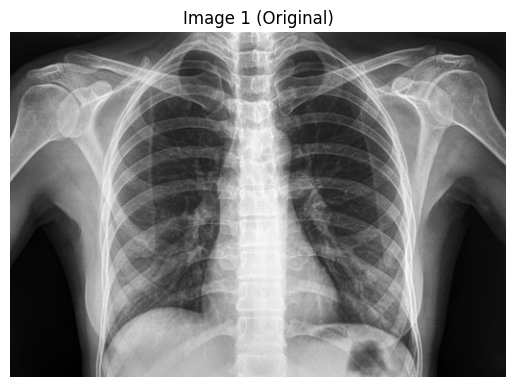

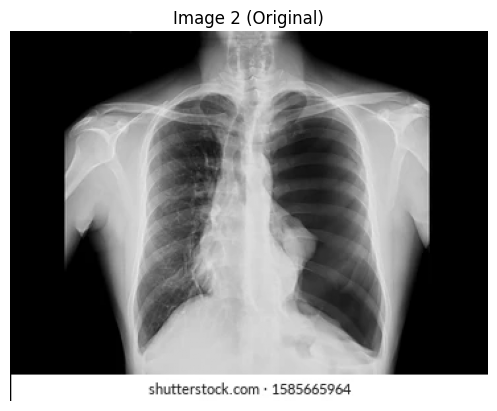

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title=""):
    if img is None:
        print(f"Warning: Image for '{title}' is None. It might not have loaded correctly.")
        return
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Corrected filenames based on uploaded files
img1 = cv2.imread("chestX-ray.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("chestX-ray1.webp", cv2.IMREAD_GRAYSCALE)

show(img1, "Image 1 (Original)")
show(img2, "Image 2 (Original)")

2️⃣ Order-Statistic (Nonlinear) Filter — Median Filter

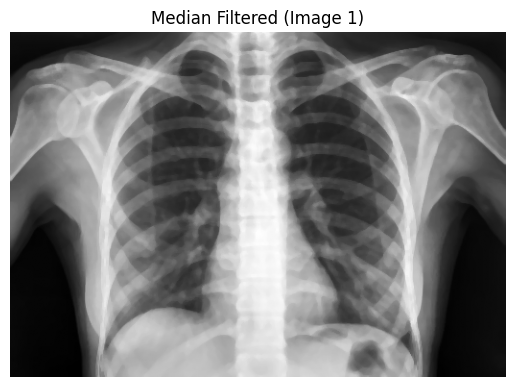

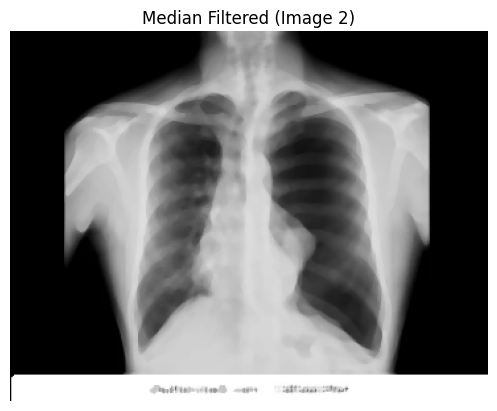

In [12]:
median1 = cv2.medianBlur(img1, 5)
median2 = cv2.medianBlur(img2, 5)

show(median1, "Median Filtered (Image 1)")
show(median2, "Median Filtered (Image 2)")

Gürültüyü (özellikle tuz-biber) yumuşatır ama kenarları çok bozmaz.

3️⃣ Sharpening — Laplacian Operator

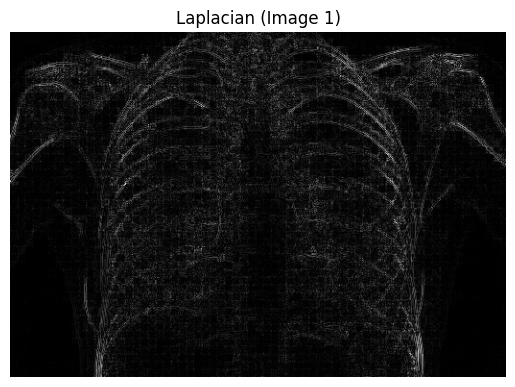

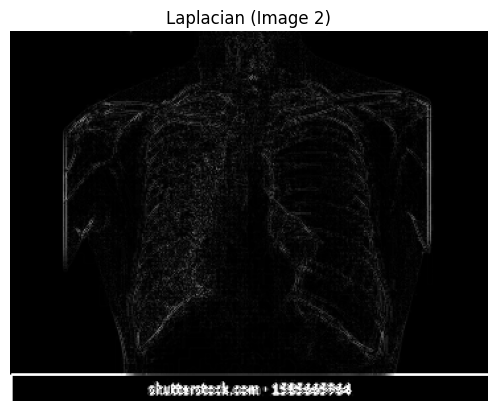

In [13]:
lap1 = cv2.Laplacian(img1, cv2.CV_64F)
lap1 = cv2.convertScaleAbs(lap1)

lap2 = cv2.Laplacian(img2, cv2.CV_64F)
lap2 = cv2.convertScaleAbs(lap2)

show(lap1, "Laplacian (Image 1)")
show(lap2, "Laplacian (Image 2)")


Laplacian operatörü, görüntülerdeki yoğunluk değişim oranını (ikinci türev) ölçerek çalışır. Bu nedenle:

*   **Kenar Algılama:** Laplacian uygulanmış görüntüler (lap1 ve lap2), orijinal görüntülerdeki (img1 ve img2) belirgin kenarları ve geçişleri parlak pikseller olarak gösterir. Düz veya homojen bölgelerde ise piksel değerleri sıfıra yakın olacaktır.
*   **Arka Plan ve Düşük Frekanslı Alanlar:** Orijinal görüntülerde geniş, düz alanlar olarak görünen bölgeler, Laplacian görüntülerinde genellikle siyaha yakın (düşük piksel değerleri) olacaktır, çünkü bu bölgelerde çok az yoğunluk değişimi vardır.
*   **Keskinleştirme:** Laplacian çıktısı doğrudan keskinleştirilmiş bir görüntü değildir, ancak kenarları vurgular. Bu çıktı, orijinal görüntüye eklenerek (veya başka işlemlerle birleştirilerek) görüntüyü keskinleştirmek için kullanılabilir.
*   **Gürültüye Duyarlılık:** Laplacian operatörü gürültüye oldukça duyarlıdır. Eğer orijinal görüntülerde gürültü varsa, Laplacian çıktısında bu gürültü de belirgin bir şekilde vurgulanabilir.

4️⃣ Unsharp Masking

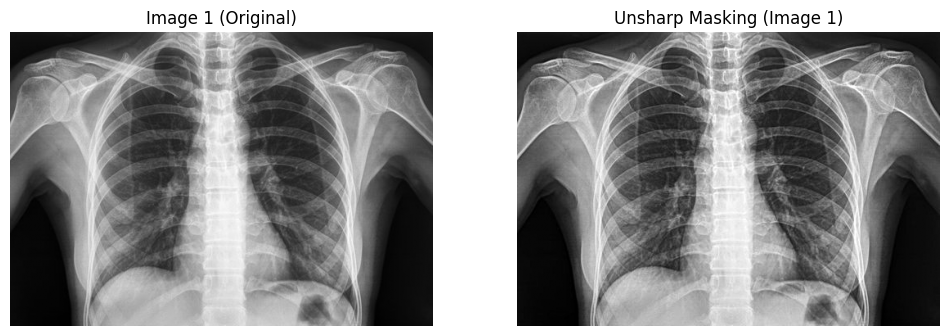

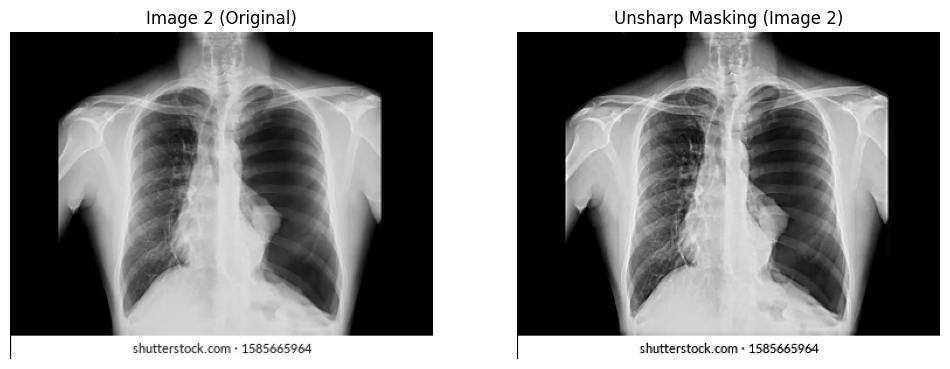

In [16]:
import matplotlib.pyplot as plt

blur1 = cv2.GaussianBlur(img1, (9,9), 5)
unsharp1 = cv2.addWeighted(img1, 1.5, blur1, -0.5, 0)

blur2 = cv2.GaussianBlur(img2, (9,9), 5)
unsharp2 = cv2.addWeighted(img2, 1.5, blur2, -0.5, 0)

# Display original and unsharp masked images side-by-side

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Image 1 (Original)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(unsharp1, cmap='gray')
plt.title("Unsharp Masking (Image 1)")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Image 2 (Original)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(unsharp2, cmap='gray')
plt.title("Unsharp Masking (Image 2)")
plt.axis("off")
plt.show()

Unsharp Masking (Keskinleştirme) işlemi, orijinal görüntüdeki detayları vurgulayarak görüntüyü daha keskin hale getirir. İşlem genel olarak şu adımları izler:

1.  **Görüntünün Bulanıklaştırılması:** Orijinal görüntüden (`img1`, `img2`) bir bulanık versiyonu (`blur1`, `blur2`) oluşturulur (genellikle Gaussian bulanıklaştırma ile).
2.  **Maske Oluşturma (Unsharp Mask):** Orijinal görüntü ile bulanık görüntü arasındaki fark alınır. Bu fark, görüntünün kenarlarını ve ince detaylarını içeren bir 'keskinleştirme maskesi' oluşturur.
3.  **Keskinleştirme:** Bu keskinleştirme maskesi, belirli bir ağırlıkla (`alpha=1.5` ve `beta=-0.5` `cv2.addWeighted` fonksiyonunda) orijinal görüntüye geri eklenir. Bu, kenarların ve detayların belirginliğini artırır.

**Çıktının Yorumu (`unsharp1` ve `unsharp2`):**

*   **Artan Kenar Kontrastı:** `unsharp` görüntülerde, orijinal görüntülere göre kenarlar daha belirgin ve keskin görünür. Bu, özellikle radyolojik görüntülerde (göğüs röntgeni gibi) teşhise yardımcı olabilecek ince detayları veya doku sınırlarını vurgulamak için faydalıdır.
*   **Genel Görüntü Netliği:** Görüntünün genel netliği artar, küçük detaylar daha kolay fark edilebilir hale gelir.
*   **Gürültü Artışı:** Unsharp masking, kenarları keskinleştirdiği gibi, görüntüdeki mevcut gürültüyü de (eğer varsa) bir miktar artırabilir. Bu nedenle, gürültülü görüntülerde dikkatli kullanılmalıdır.

Özetle, unsharp masking uygulanmış görüntüler, orijinaline kıyasla daha net, daha keskin kenarlı ve detaylı görünür, ancak bu işlem gürültüyü de biraz güçlendirebilir.

5️⃣ High-Boost Filtering

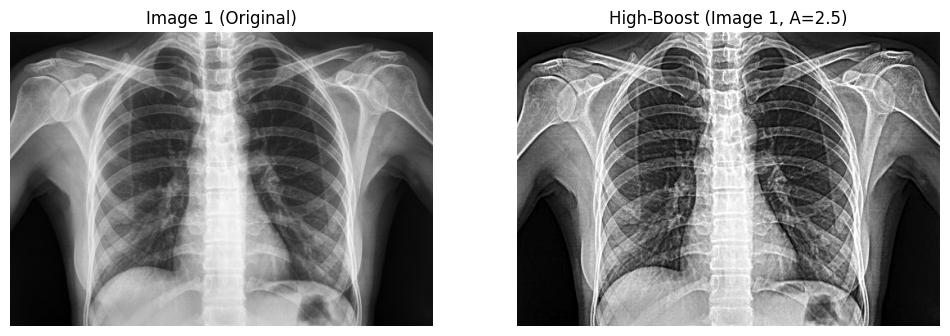

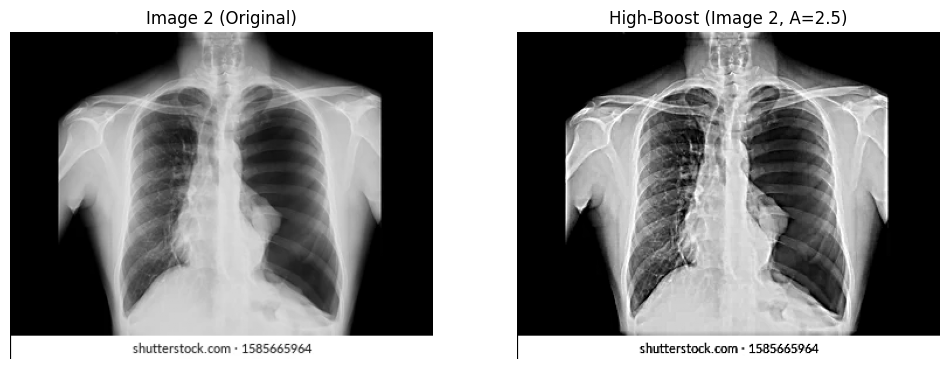

In [19]:
import matplotlib.pyplot as plt

A = 2.5   # dene: 1.5, 2, 3 ...
highboost1 = cv2.addWeighted(img1, A, blur1, -(A-1), 0)
highboost2 = cv2.addWeighted(img2, A, blur2, -(A-1), 0)

# Display original and high-boost filtered images side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Image 1 (Original)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(highboost1, cmap='gray')
plt.title(f"High-Boost (Image 1, A={A})")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Image 2 (Original)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(highboost2, cmap='gray')
plt.title(f"High-Boost (Image 2, A={A})")
plt.axis("off")
plt.show()

High-Boost Filtering (Yüksek Güçlendirmeli Filtreleme), Unsharp Masking'in daha gelişmiş bir versiyonudur. Temel amacı, görüntüdeki kenarları ve detayları vurgulayarak görüntüyü daha keskin hale getirmektir. Bu yöntem, orijinal görüntüye keskinleştirme maskesini daha yüksek bir 'güçlendirme faktörü' (`A`) ile ekleyerek çalışır.

**İşlem Adımları:**

1.  **Görüntünün Bulanıklaştırılması:** Orijinal görüntüden (`img1`, `img2`) Gaussian bulanıklaştırma ile bir bulanık versiyon (`blur1`, `blur2`) elde edilir.
2.  **Keskinleştirme Maskesi:** Orijinal görüntüden bulanık görüntü çıkarılarak kenar ve detay bilgilerini içeren bir maske oluşturulur.
3.  **Güçlendirme ve Ekleme:** Bu keskinleştirme maskesi, `A` katsayısı ile çarpılarak orijinal görüntüye eklenir. `A` değeri ne kadar yüksekse, keskinleştirme etkisi o kadar güçlü olur. `cv2.addWeighted` fonksiyonunda kullanılan `A` ve `-(A-1)` katsayıları bu işlemi sağlar.

**Çıktının Yorumu (`highboost1` ve `highboost2`):**

*   **Daha Agresif Keskinleştirme:** `A=2.5` gibi bir değerle, High-Boost filtreleme, Unsharp Masking'e göre (genellikle `A=1.5` olarak düşünülür) kenarları ve ince detayları daha belirgin bir şekilde vurgular. Görüntü daha 'canlı' ve 'net' görünür.
*   **Artan Kontrast ve Detay Vurgusu:** Özellikle radyolojik görüntülerde (göğüs röntgenleri gibi), hafif kontrast farklılıkları olan bölgeler veya belirsiz kenarlar daha keskin hale gelir. Bu, teşhis için önemli olan yapıların daha iyi görünmesine yardımcı olabilir.
*   **Gürültüye Duyarlılık:** `A` değeri arttıkça, görüntüdeki gürültü de (eğer varsa) daha fazla vurgulanabilir. Bu, görüntünün grenli görünmesine neden olabilir. Bu nedenle `A` değeri seçimi önemlidir; çok yüksek bir `A` değeri görüntünün doğal görünümünü bozabilir.

Özetle, High-Boost filtreleme, Unsharp Masking'e kıyasla daha güçlü bir keskinleştirme sağlar, ancak bu, gürültü amplifikasyonu riskini de beraberinde getirir. Görüntüdeki küçük detayları ve kenarları öne çıkarmak için etkili bir yöntemdir.

6️⃣ Gradient (Birinci Türev) ile Nonlinear Sharpening

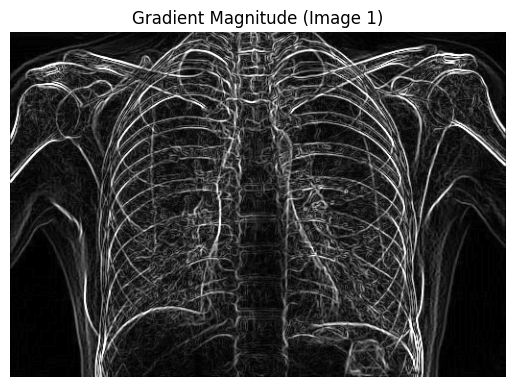

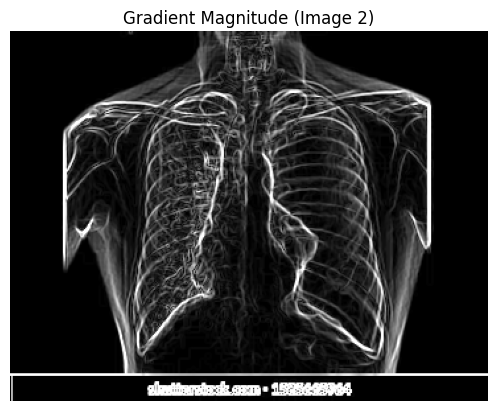

In [20]:
gx1 = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
gy1 = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)
grad1 = cv2.convertScaleAbs(np.sqrt(gx1**2 + gy1**2))

gx2 = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=3)
gy2 = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=3)
grad2 = cv2.convertScaleAbs(np.sqrt(gx2**2 + gy2**2))

show(grad1, "Gradient Magnitude (Image 1)")
show(grad2, "Gradient Magnitude (Image 2)")


Gradient (Birinci Türev) ile Nonlinear Sharpening işlemi, görüntüdeki yoğunluk değişimlerini (kenarları) vurgulayarak görüntüyü keskinleştirmeyi hedefler. Bu yöntemde temel olarak gradyan büyüklüğü kullanılır.

**İşlem Adımları:**

1.  **Gradiyan Hesaplama (Sobel Operatörü):** Görüntünün x (`gx`) ve y (`gy`) yönündeki gradyanları Sobel operatörü kullanılarak hesaplanır. Bu gradyanlar, pikseller arasındaki yoğunluk değişim hızını temsil eder.
2.  **Gradiyan Büyüklüğü:** x ve y yönündeki gradyan bileşenlerinden (`gx`, `gy`) gradyanın büyüklüğü (magnitude) hesaplanır: `grad = sqrt(gx^2 + gy^2)`. Bu büyüklük, bir pikseldeki yoğunluk değişiminin genel şiddetini gösterir. Kenarlarda gradyan büyüklüğü yüksek, düz bölgelerde ise düşüktür.
3.  **Ölçeklendirme:** Hesaplanan gradyan büyüklüğü `cv2.convertScaleAbs` ile 0-255 aralığına ölçeklenerek görüntülenebilir hale getirilir.

**Çıktının Yorumu (`grad1` ve `grad2`):**

*   **Kenar Vurgusu:** Çıktı görüntülerinde (grad1 ve grad2), orijinal görüntülerdeki (img1 ve img2) tüm belirgin kenarlar ve detaylar parlak pikseller olarak görünür. Yoğunluk değişiminin az olduğu (düz) bölgeler ise koyu (siyaha yakın) olacaktır.
*   **Gürültüye Duyarlılık:** Gradiyan tabanlı yöntemler, kenarları vurguladığı gibi, görüntüdeki yüksek frekanslı gürültüyü de vurgulayabilir. Bu nedenle, gürültülü görüntülerde gradyan çıktıları da gürültülü görünebilir.
*   **Keskinleştirme İçin Kullanım:** Doğrudan keskinleştirilmiş bir görüntü olmasa da, gradyan büyüklüğü görüntünün kenar bilgisini içerir. Bu bilgi, orijinal görüntüye eklenerek veya başka yöntemlerle birleştirilerek görüntü keskinleştirme algoritmalarında kullanılabilir. Örneğin, orijinal görüntüye gradyan büyüklüğünün bir katsayı ile eklenmesi, kenarları daha belirgin hale getirir.

Özetle, bu işlem görüntünün sadece kenar bilgilerini ortaya çıkarır. Bu kenar bilgileri, görüntüyü daha keskin hale getirmek için ileri işlemlerin bir parçası olarak kullanılabilir.

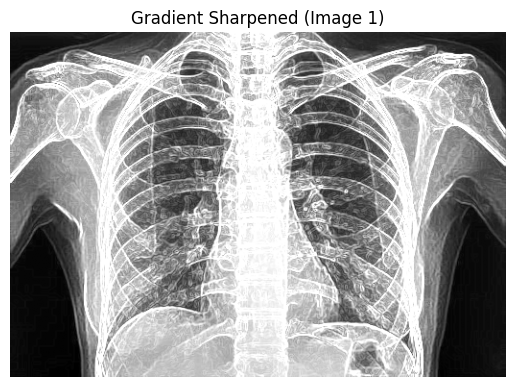

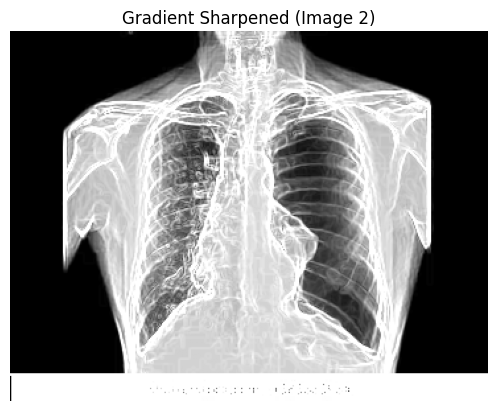

In [21]:
sharp_grad1 = cv2.add(img1, grad1)
sharp_grad2 = cv2.add(img2, grad2)

show(sharp_grad1, "Gradient Sharpened (Image 1)")
show(sharp_grad2, "Gradient Sharpened (Image 2)")


**Gradiyan ile Keskinleştirme (Gradient Sharpening) Çıktısının Yorumu:**

Önceki adımda hesapladığımız gradyan büyüklükleri (`grad1`, `grad2`), aslında görüntünün kenar bilgilerini içeren haritalardır. `sharp_grad1 = cv2.add(img1, grad1)` ve `sharp_grad2 = cv2.add(img2, grad2)` satırlarıyla yaptığımız işlem, bu kenar bilgilerini orijinal görüntülere geri ekleyerek görüntüyü keskinleştirmektir.

**Çıktının Yorumu (`sharp_grad1` ve `sharp_grad2`):**

*   **Vurgulanmış Kenarlar:** Çıktı görüntülerinde (sharp_grad1 ve sharp_grad2), orijinal görüntülere kıyasla kenarlar çok daha belirgin ve keskin görünür. Gradiyan bilgisi, yoğunluk değişimlerinin olduğu bölgelere (yani kenarlara) daha fazla parlaklık ekleyerek bu etkiyi yaratır.
*   **Genel Parlaklık Artışı (Muhtemel):** Gradiyan değerleri genellikle pozitiftir (0-255). Bu değerler doğrudan orijinal görüntü piksellerine eklendiğinde, görüntünün genel parlaklığında hafif bir artış da gözlemlenebilir.
*   **Gürültü Vurgusu:** Laplacian operatöründe olduğu gibi, gradyan tabanlı yöntemler de gürültüye duyarlıdır. Eğer orijinal görüntüde gürültü varsa, bu gürültü de kenar gibi algılanıp keskinleştirme işlemi sırasında vurgulanabilir. Bu durum, gürültülü bölgelerin daha belirgin veya 'grenli' görünmesine neden olabilir.
*   **Detayların Ortaya Çıkması:** Özellikle orijinal görüntülerde zor fark edilen ince detaylar ve dokular, bu keskinleştirme işlemi sayesinde daha görünür hale gelir. Tıbbi görüntülerde (röntgen gibi) bu, teşhis için önemli yapıların daha iyi algılanmasına yardımcı olabilir.

Özetle, `cv2.add` ile yapılan bu işlem, gradyan büyüklüğünü orijinal görüntüye ekleyerek görüntüdeki kenarları ve ince detayları güçlendirir, bu da daha keskin ve vurgulanmış bir görünüm sağlar.